# Java Script code to download images url from google SERP.



var urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
var hiddenElement = document.createElement('a');
hiddenElement.href = 'data:text/csv;charset=utf-8,' + encodeURI(urls.join('\n'));
hiddenElement.target = '_blank';
hiddenElement.download = 'images.csv';
hiddenElement.click();

#Importing fastai

In [0]:
from fastai.vision import *

In [0]:
!mkdir images

In [0]:
!cp cats.csv /content/images/

In [0]:
!cp dogs.csv /content/images/

In [0]:
!cp horses.csv /content/images/

In [0]:
!cp cows.csv /content/images/

In [0]:
path = Path('/content/images/')

## Download images

In [8]:
for file, folder in [('cats.csv', 'Cats'), ('cows.csv', 'Cows'), 
                     ('dogs.csv', 'Dogs'), ('horses.csv', 'Horses')]:
    dest = path/folder # path + '/' + folder
    dest.mkdir(parents=True, exist_ok=True)
    download_images(path/file, dest, max_pics=200)

## Verify images

In [9]:
doc(verify_images)

In [10]:
for folder in ('Cats', 'Cows', 'Dogs', 'Horses'):
    print(folder)
    verify_images(path/folder, delete=True, max_size=500)

Cats


Cows


Dogs


Horses


## View data

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [12]:
data.classes

['Cats', 'Cows', 'Dogs', 'Horses']

In [13]:
doc(data.show_batch)

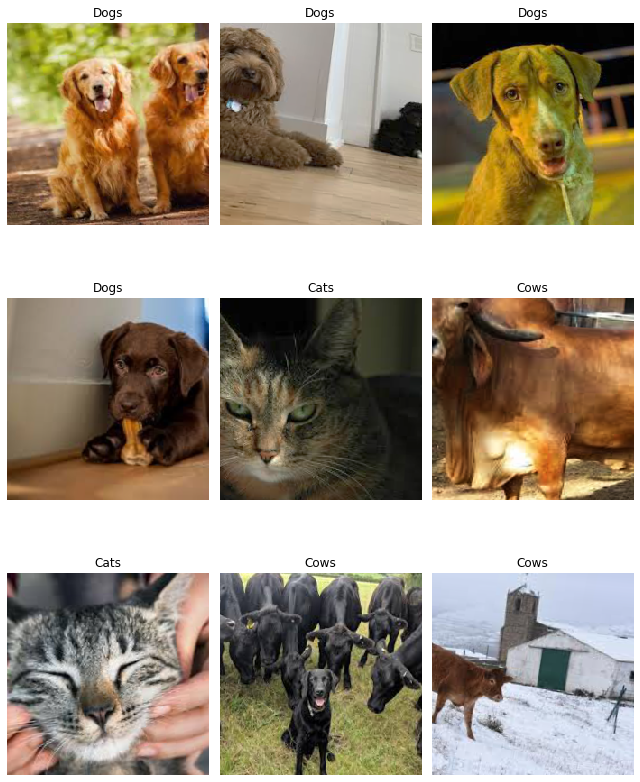

In [14]:
data.show_batch(rows=3, figsize=(9, 12))

In [15]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Cats', 'Cows', 'Dogs', 'Horses'], 4, 544, 136)

## Initial training

In [16]:
from fastai.metrics import error_rate # 1 - accuracy
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [17]:
learn

Learner(data=ImageDataBunch;

Train: LabelList (544 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Cows,Cows,Cows,Cows,Cows
Path: /content/images;

Valid: LabelList (136 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Dogs,Dogs,Cows,Cats,Cows
Path: /content/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runnin

In [18]:
doc(learn.fit_one_cycle)

In [19]:
defaults.device = torch.device('cuda') # makes sure the gpu is used
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.451027,0.259188,0.095588,00:08
1,0.886755,0.159850,0.051471,00:07
2,0.619853,0.153170,0.044118,00:07
3,0.476766,0.163035,0.044118,00:07


In [0]:
learn.unfreeze()

In [21]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 4.37E-05
Min loss divided by 10: 3.31E-05


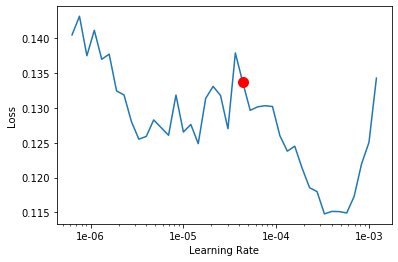

In [22]:
learn.recorder.plot(suggestion=True)

In [23]:
learn.fit_one_cycle(4, max_lr=slice(2.5e-4, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.155626,0.165640,0.058824,00:07
1,0.175139,0.928428,0.169118,00:07
2,0.160818,0.400822,0.066176,00:07
3,0.141936,0.381393,0.073529,00:07


In [0]:
learn.save('stage-1')

## Interpretation

In [25]:
interp = ClassificationInterpretation.from_learner(learn)

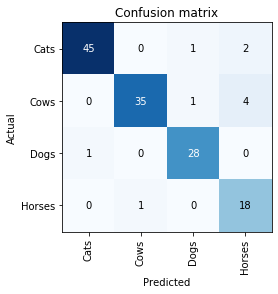

In [26]:
interp.plot_confusion_matrix()

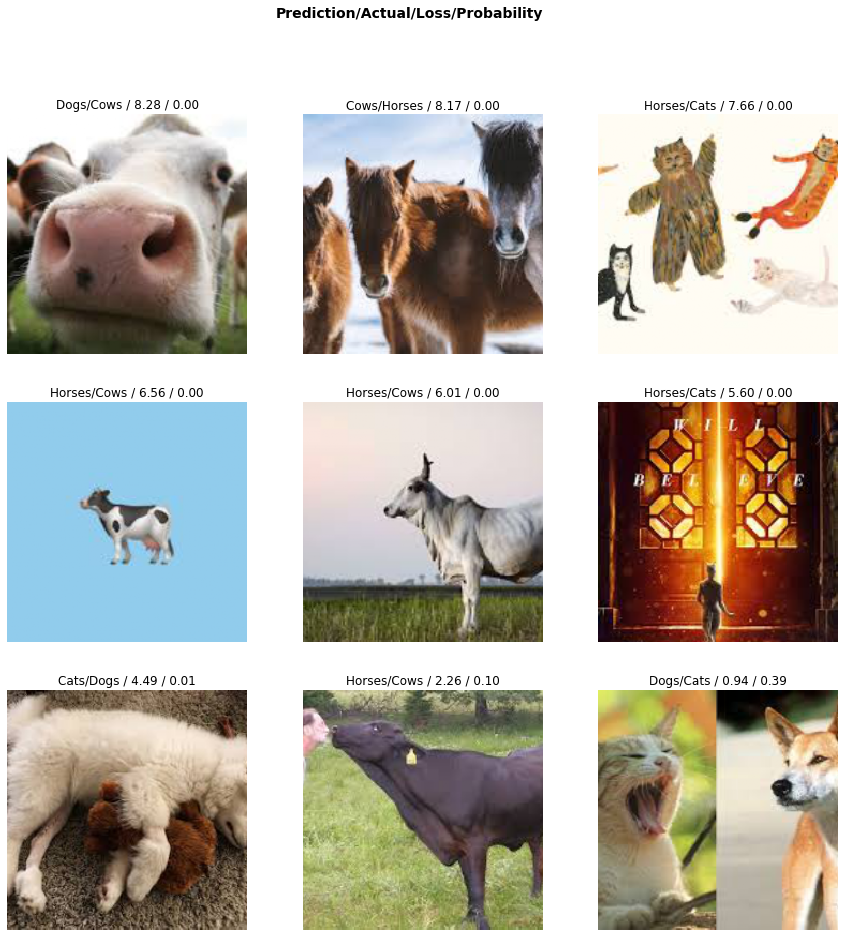

In [27]:
interp.plot_top_losses(9, figsize=(15,15))

#putting model into production

In [0]:
learn.export()

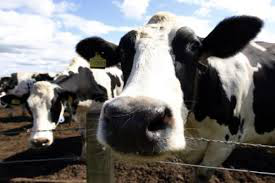

In [45]:
img = open_image('/content/mj.jpg')
img

In [0]:
learn = load_learner(path)

In [47]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category Cows